In [71]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

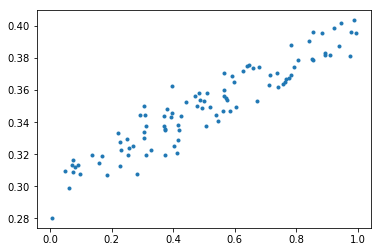

In [72]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise
pylab.plot(x_data, y_data, '.')

In [73]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [74]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(y - y_data))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.4)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.global_variables_initializer()  # Create an operation initializes all the variables.


In [75]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)  # Save initial values for plotting later.


In [76]:
for step in range(201):
    sess.run(train)

(0, 1.0)

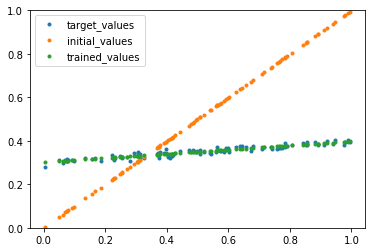

In [77]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)